In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing required modules

In [ ]:
!pip install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

For the first time, use it to combine all training .csv feature files into one.

In [ ]:
#path to the .csv file containing all the training file features
train = pd.read_csv('/content/drive/MyDrive/NLP/training_data_feat_complete.csv')
train = train.iloc[:, 1:]
train.head()

,Sentences,tfisf,capital,sent_similarity,keyword,content_words,class
0,Darty plc Annual report 2013/14\nAnnual repor...,0.365608,0.000000,0.450426,0.500000,0.916667,0
1,CONTENTS\nOverview\n01 Group at a glance\n02 ...,0.505029,0.090909,0.578855,0.166667,1.000000,0
2,Our markets\n05 Strategy\n06,1.260592,0.000000,0.866590,0.000000,0.666667,0
3,Our business model and strategy\n07 Chief exe...,0.038922,0.031579,0.063381,0.077922,0.954545,0
4,Shareholder information\n132 Group five-year s...,0.312055,0.000000,0.547423,0.250000,0.916667,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715675 entries, 0 to 4715674
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Sentences        object 
 1   tfisf            float64
 2   capital          float64
 3   sent_similarity  float64
 4   keyword          float64
 5   content_words    float64
 6   class            int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 251.8+ MB


In [ ]:
train.describe()

,tfisf,capital,sent_similarity,keyword,content_words,class
count,4.715675e+06,4.715675e+06,4.715675e+06,4.715675e+06,4.715675e+06,4.715675e+06
mean,4.518890e-01,3.584718e-02,6.728209e-01,8.087860e-02,8.495309e-01,1.699926e-02
std,4.882291e-01,1.061382e-01,1.962868e-01,1.288309e-01,1.113661e-01,1.292683e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.319472e-01,0.000000e+00,5.431358e-01,0.000000e+00,8.000000e-01,0.000000e+00
50%,3.421200e-01,0.000000e+00,6.931762e-01,0.000000e+00,8.571429e-01,0.000000e+00
75%,5.114399e-01,1.960784e-02,8.262236e-01,1.250000e-01,9.166667e-01,0.000000e+00
max,9.962982e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
train.shape

(4715675, 7)

In [ ]:
train.iloc[:, 1:].isnull().sum()

tfisf              0
capital            0
sent_similarity    0
keyword            0
content_words      0
class              0
dtype: int64

In [ ]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 159259


<Axes: xlabel='class', ylabel='count'>

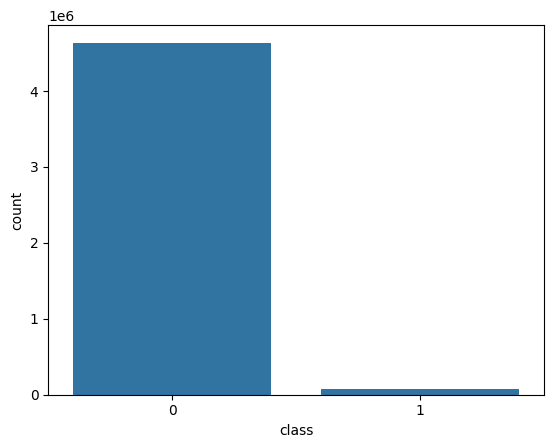

In [ ]:
sns.countplot(x=train['class'])

In [ ]:
print('Class distribution Training set:')
print(train['class'].value_counts())

Class distribution Training set:
0    4635512
1      80163
Name: class, dtype: int64


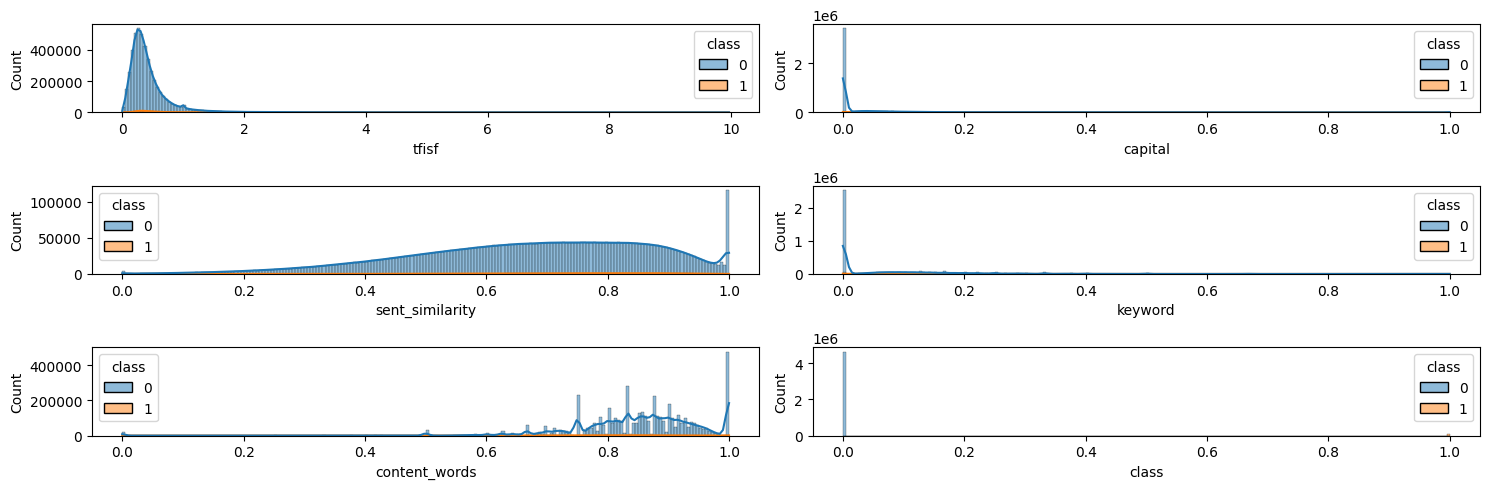

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(15,5))
axes = axes.flatten()
sns.histplot(data=train, x='tfisf', hue='class',bins=200, ax=axes[0], kde=True)
sns.histplot(data=train, x='capital', hue='class',bins=200, ax=axes[1], kde=True)
sns.histplot(data=train, x='sent_similarity', hue='class',bins=200, ax=axes[2], kde=True)
sns.histplot(data=train, x='keyword', hue='class',bins=200, ax=axes[3], kde=True)
sns.histplot(data=train, x='content_words', hue='class',bins=200, ax=axes[4], kde=True)
sns.histplot(data=train, x='class', hue='class',bins=200, ax=axes[5], kde=True)
plt.tight_layout()
plt.show()

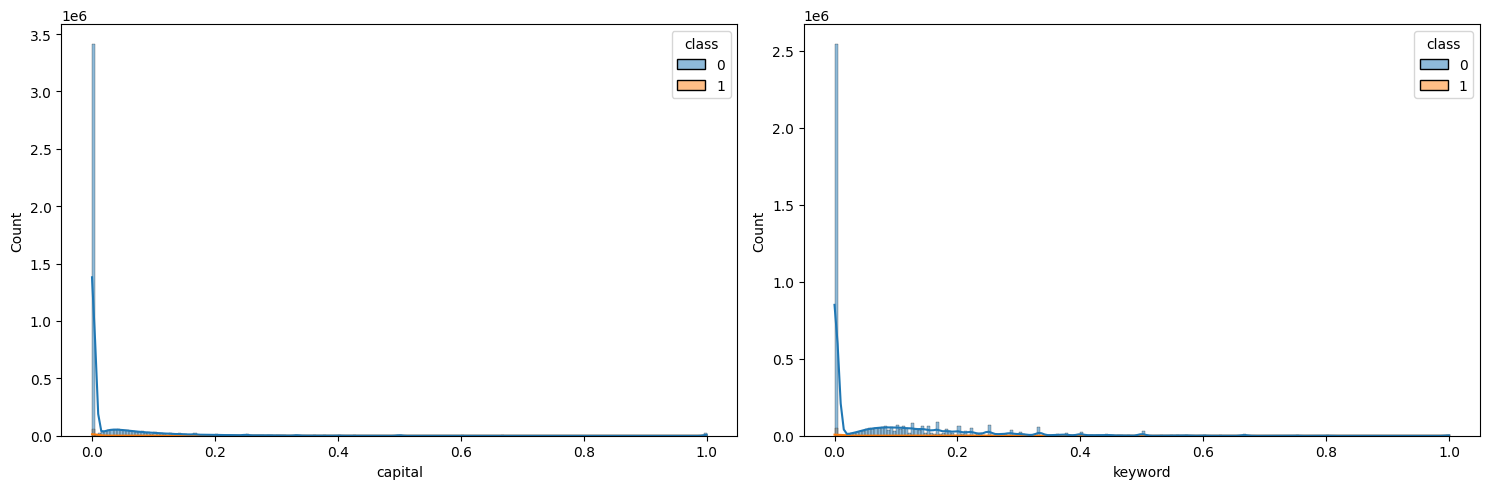

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=train, x='capital', hue='class',bins=200, ax=axes[0], kde=True)
sns.histplot(data=train, x='keyword', hue='class',bins=200, ax=axes[1], kde=True)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=train, x='capital', hue='class',bins=200, ax=axes[0], kde=True)
sns.histplot(data=train, x='keyword', hue='class',bins=200, ax=axes[1], kde=True)
plt.tight_layout()
plt.show()

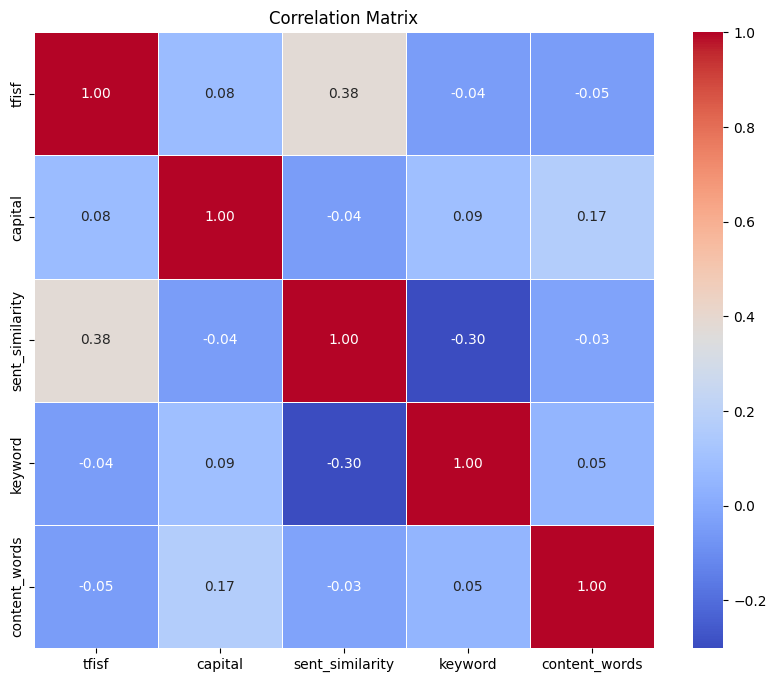

In [ ]:
new_df = train.iloc[:, 1:-1]
correlation_matrix = new_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
param = {}
for col in list(train.columns)[1:-1]:
  col_values = train[col]
  mean = np.mean(col_values)
  stdev = np.std(col_values)

  sorted_col_values = sorted(col_values)
  for i in range(len(sorted_col_values)):
    if sorted_col_values[i] == mean:
      start = i
      for j in range(i, len(sorted_col_values)):
        if sorted_col_values[j] > mean:
          break
      end = j
      break
    elif sorted_col_values[i] > mean:
      start = i
      end = i
      break
  L_M = np.sum(sorted_col_values[:end])
  R_M = np.sum(sorted_col_values[start:])
  S = L_M/float(R_M)

  sd_R = stdev/(1+S)
  sd_L = sd_R*S

  LL = mean - sd_L
  UL = mean + sd_R

  param[col] = [LL, mean, UL]

for key, value in param.items():
    print(key+": "+str(value))

tfisf: [0.2536065401119694, 0.451889034786618, 0.7418356339182273]
capital: [0.032327843324523646, 0.03584718414607536, 0.13846605432493106]
sent_similarity: [0.6053414174965925, 0.6728208678734243, 0.8016282437281385]
keyword: [0.0722868213327332, 0.08087860069935249, 0.2011177326738737]
content_words: [0.8051227029902677, 0.8495309264259594, 0.9164887501389241]


In [ ]:
train0 = train[train['class'] == 0]
train1 = train[train['class'] == 1]

In [ ]:
params = {}
columns = list(train0.columns)[1:-1]
for col in columns:
  x = train1[col]
  x1 = [np.mean(x), np.std(x)]
  y = train0[col]
  y1 = [np.mean(y), np.std(y)]
  params[col] = [x1, y1]

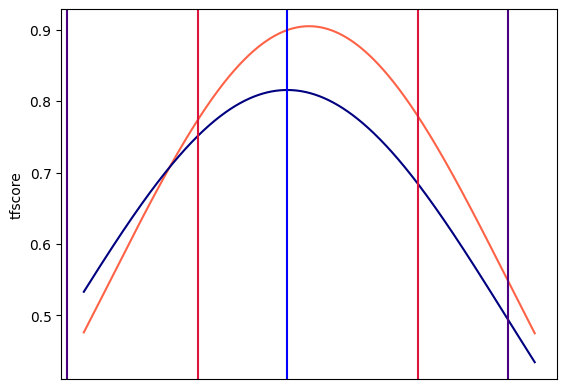

In [ ]:
x = params['tfisf']
mn1, std1 = x[0][0], x[0][1]
mn2, std2 = x[1][0], x[1][1]
x2 = np.linspace(0.0, 1, 2000)
plt.plot(x2, scipy.stats.norm.pdf(x2, mn1, std1), color = 'tomato')
plt.plot(x2, scipy.stats.norm.pdf(x2, mn2, std2), color = 'navy')
plt.axvline(x = mn2, color = 'b')
plt.axvline(x = mn2-std2, color = 'indigo')
plt.axvline(x = mn2+std2, color = 'indigo')
plt.axvline(x = 0.2536065401119694, color = 'crimson')
plt.axvline(x = 0.7418356339182273, color = 'crimson')
plt.ylabel("tfscore")
plt.tick_params(bottom = False, labelbottom = False)
plt.show()

In [ ]:
mn2

0.035921774272564044

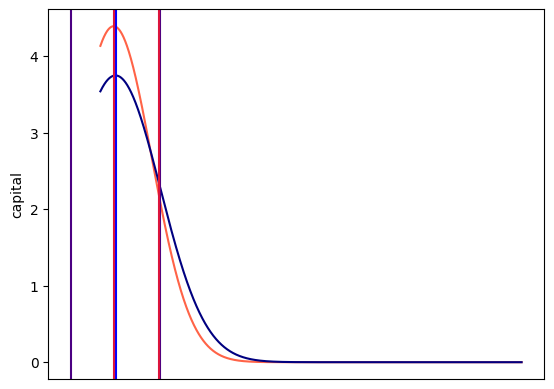

In [ ]:
x = params['capital']
mn1, std1 = x[0][0], x[0][1]
mn2, std2 = x[1][0], x[1][1]
x2 = np.linspace(0.0, 1, 2000)
plt.plot(x2, scipy.stats.norm.pdf(x2, mn1, std1), color = 'tomato')
plt.plot(x2, scipy.stats.norm.pdf(x2, mn2, std2), color = 'navy')
plt.axvline(x = mn2, color = 'b')
plt.axvline(x = mn2-std2, color = 'indigo')
plt.axvline(x = mn2+std2, color = 'indigo')
plt.axvline(x = 0.032327843324523646, color = 'crimson')
plt.axvline(x = 0.13846605432493106, color = 'crimson')
plt.ylabel("capital")
plt.tick_params(bottom = False, labelbottom = False)
plt.show()

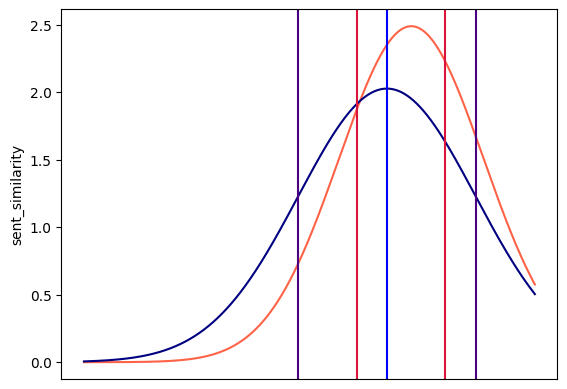

In [ ]:
x = params['sent_similarity']
mn1, std1 = x[0][0], x[0][1]
mn2, std2 = x[1][0], x[1][1]
x2 = np.linspace(0.0, 1, 2000)
plt.plot(x2, scipy.stats.norm.pdf(x2, mn1, std1), color = 'tomato')
plt.plot(x2, scipy.stats.norm.pdf(x2, mn2, std2), color = 'navy')
plt.axvline(x = mn2, color = 'b')
plt.axvline(x = mn2-std2, color = 'indigo')
plt.axvline(x = mn2+std2, color = 'indigo')
plt.axvline(x = 0.6053414174965925, color = 'crimson')
plt.axvline(x = 0.8016282437281385, color = 'crimson')
plt.ylabel("sent_similarity")
plt.tick_params(bottom = False, labelbottom = False)
plt.show()

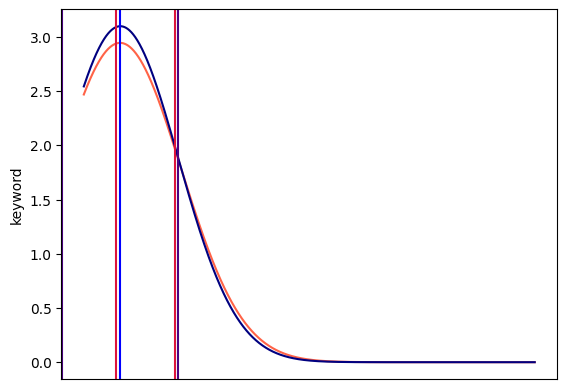

In [ ]:
x = params['keyword']
mn1, std1 = x[0][0], x[0][1]
mn2, std2 = x[1][0], x[1][1]
x2 = np.linspace(0.0, 1, 2000)
plt.plot(x2, scipy.stats.norm.pdf(x2, mn1, std1), color = 'tomato')
plt.plot(x2, scipy.stats.norm.pdf(x2, mn2, std2), color = 'navy')
plt.axvline(x = mn2, color = 'b')
plt.axvline(x = mn2-std2, color = 'indigo')
plt.axvline(x = mn2+std2, color = 'indigo')
plt.axvline(x = 0.0722868213327332, color = 'crimson')
plt.axvline(x = 0.2011177326738737, color = 'crimson')
plt.ylabel("keyword")
plt.tick_params(bottom = False, labelbottom = False)
plt.show()

In [ ]:
[0.8051227029902677, 0.8495309264259594, 0.9164887501389241]

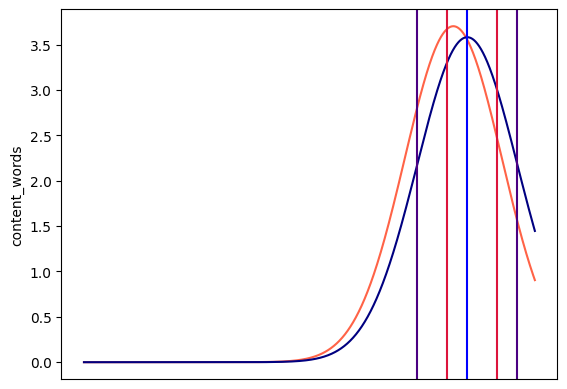

In [ ]:
x = params['content_words']
mn1, std1 = x[0][0], x[0][1]
mn2, std2 = x[1][0], x[1][1]
x2 = np.linspace(0.0, 1, 2000)
plt.plot(x2, scipy.stats.norm.pdf(x2, mn1, std1), color = 'tomato')
plt.plot(x2, scipy.stats.norm.pdf(x2, mn2, std2), color = 'navy')
plt.axvline(x = mn2, color = 'b')
plt.axvline(x = mn2-std2, color = 'indigo')
plt.axvline(x = mn2+std2, color = 'indigo')
plt.axvline(x = 0.8051227029902677, color = 'crimson')
plt.axvline(x = 0.9164887501389241, color = 'crimson')
plt.ylabel("content_words")
plt.tick_params(bottom = False, labelbottom = False)
plt.show()